In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


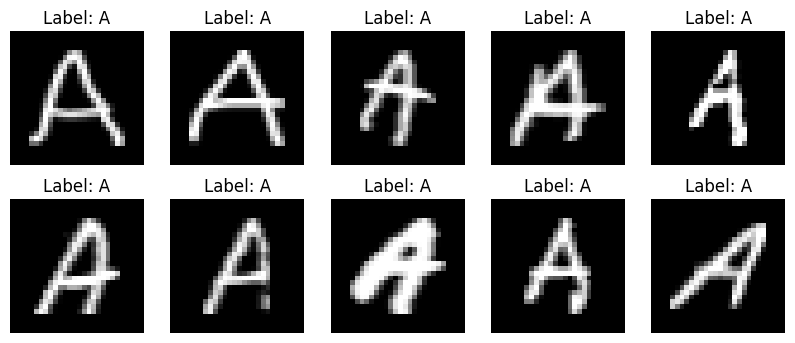

In [11]:
# Load A-Z Handwritten Alphabets Dataset
az_data = pd.read_csv('A_Z_Handwritten_Data.csv').values

# Calculate the number of images
num_images = az_data.shape[0]

# Separate features and labels
X_az = az_data[:, 1:].reshape(num_images, 28, 28, 1)  # Reshape using calculated num_images
y_az = az_data[:, 0].astype(int)  # Labels (A-Z mapped to 0-25), cast to integers

# Visualize some A-Z samples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_az[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {chr(y_az[i] + 65)}")  # Now y_az[i] is an integer
    plt.axis('off')
plt.show()

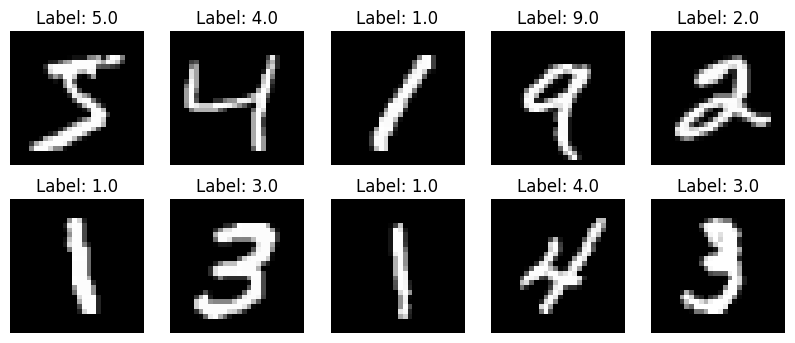

In [5]:
# Load MNIST Dataset
mnist_data = pd.read_csv('mnist_train.csv').values

# Separate features and labels
X_mnist = mnist_data[:, 1:].reshape(-1, 28, 28, 1)  # Reshape to 28x28 pixels with 1 channel
y_mnist = mnist_data[:, 0]  # Labels (0-9)

# Filter MNIST dataset to include only digits 1-9
mask = y_mnist > 0
X_mnist = X_mnist[mask]
y_mnist = y_mnist[mask]

# Visualize some MNIST samples (digits 1-9)
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_mnist[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_mnist[i]}")
    plt.axis('off')
plt.show()


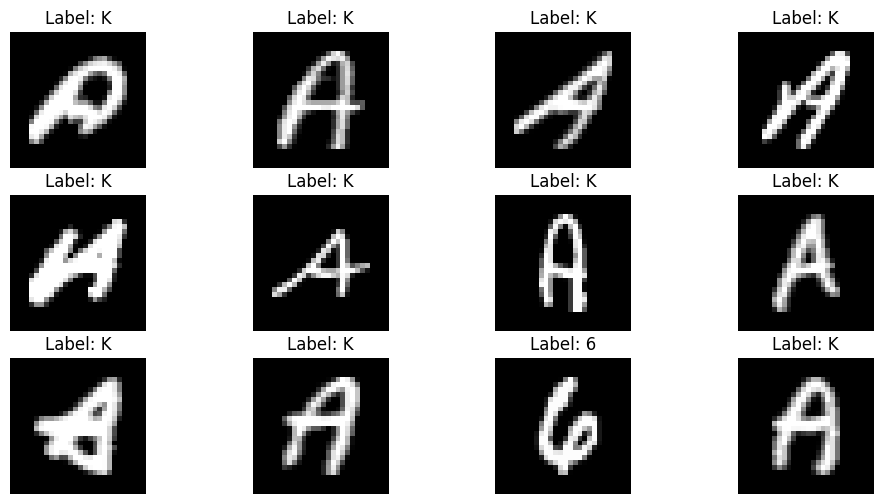

Combined dataset shape: (7878, 28, 28, 1) (1970, 28, 28, 1)


In [13]:
# Adjust labels of A-Z dataset to start from 10
y_az = y_az + 10  # A-Z (0-25) becomes (10-35)

# Combine A-Z and MNIST 1-9 datasets
X_combined = np.concatenate((X_az, X_mnist), axis=0)
y_combined = np.concatenate((y_az, y_mnist), axis=0)

# Ensure labels are integers
y_combined = y_combined.astype(int)  # Convert labels to integers

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Visualize some combined samples
plt.figure(figsize=(12, 6))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    label = y_train[i]
    if label < 10:
        plt.title(f"Label: {label}")
    else:
        plt.title(f"Label: {chr(label + 55)}")  # Now 'label' is guaranteed to be an integer
    plt.axis('off')
plt.show()

print("Combined dataset shape:", X_train.shape, X_test.shape)

In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(36, activation='softmax')  # 36 output classes (1-9 and A-Z)
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           2,340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,012 (371.14 KB)

 Trainable params: 95,012 (371.14 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test))


Epoch 1/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.6660 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan


In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0000e+00 - loss: nan
Test accuracy: 0.0


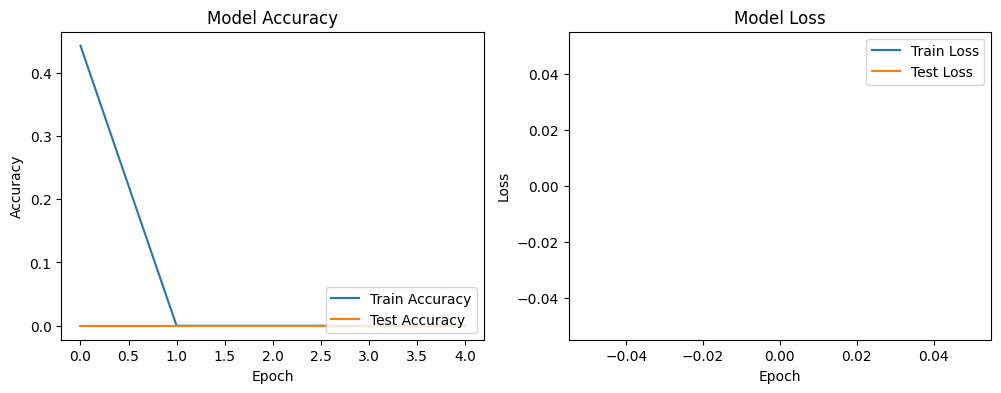

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


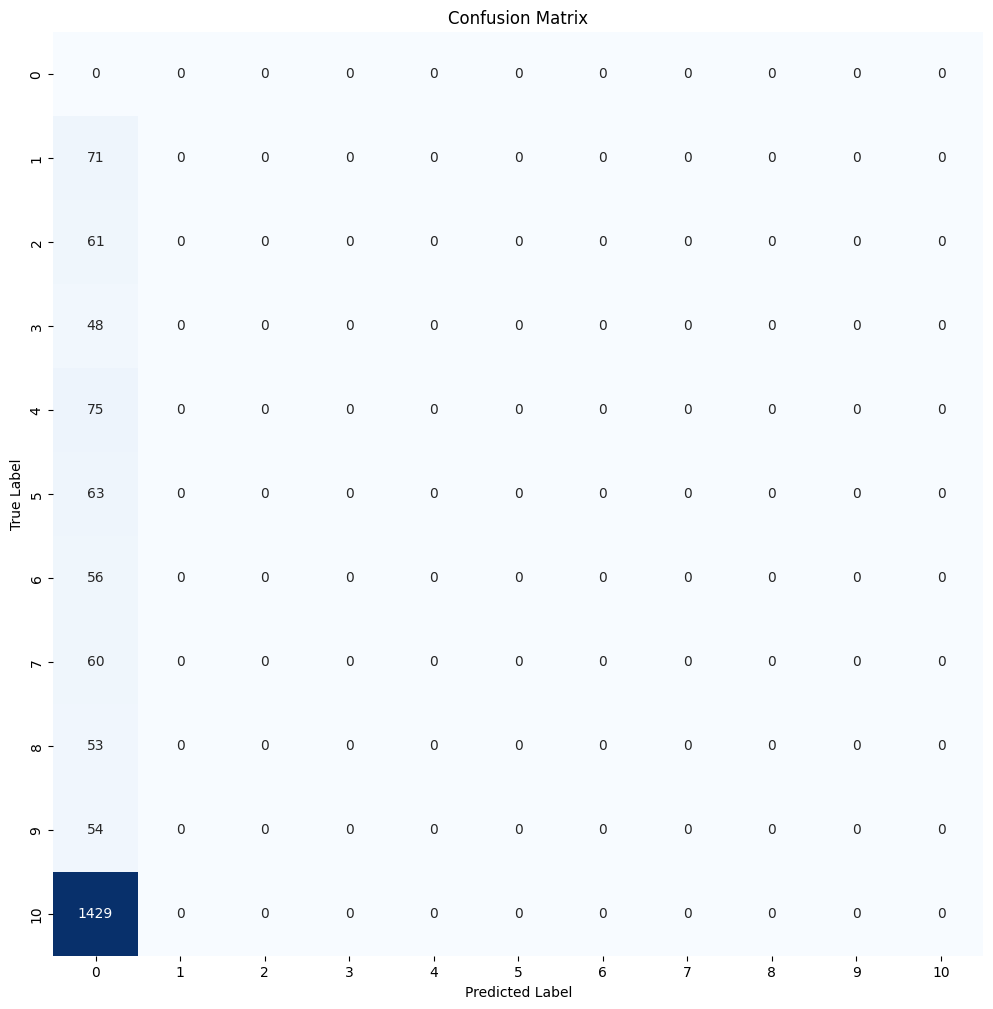

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


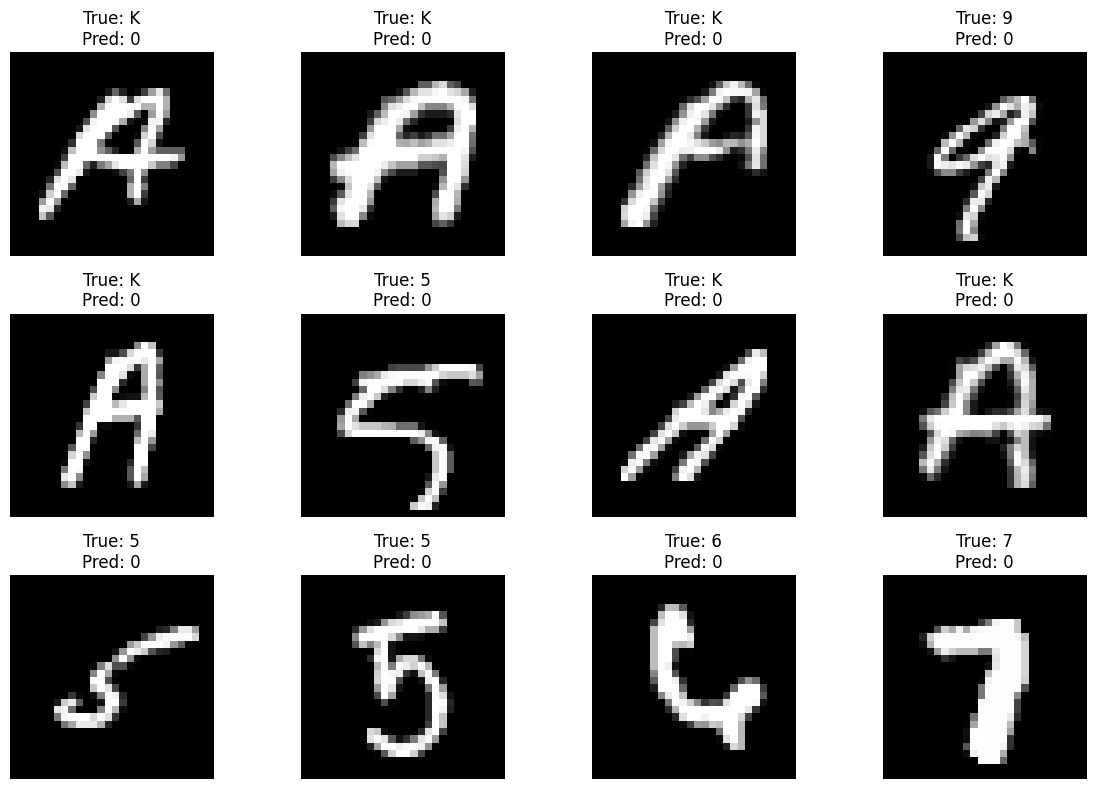

In [21]:
# Find the misclassified examples
misclassified_indices = np.where(y_pred_classes != y_test)[0]

# Plot some of the misclassified examples
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:12]):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    true_label = y_test[idx]
    predicted_label = y_pred_classes[idx]
    plt.title(f"True: {chr(true_label + 55) if true_label >= 10 else true_label}\nPred: {chr(predicted_label + 55) if predicted_label >= 10 else predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [19]:
model.save('handwritten_character_recognition_model.h5')
print("Model saved successfully!")


Model saved successfully!
